1.) What was the change in price of the stock over time?
<br>
2.) What was the daily return of the stock on average?
<br>
3.) What was the moving average of the various stocks?
<br>
4.) What was the correlation between different stocks' closing prices?
<br>
4.) What was the correlation between different stocks' daily returns?
<br>
5.) How much value do we put at risk by investing in a particular stock?
<br>
6.) How can we attempt to predict future stock behavior?
<br>
Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#nice white grid background for all of our visualizations
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
import pandas_datareader.data as web
import yfinance as yf

In [5]:
from datetime import datetime

In [6]:
tech_list = ["AAPL","GOOG","MSFT","AMZN"]

In [7]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [8]:
# Global making a global variable for each of the iterations
for stock in tech_list:
    globals()[stock]= yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
#AAPL.describe()
#AAPL.info()
#Adjusted closing price takes into account any stock changes (split stocks etc.)

<AxesSubplot:xlabel='Date'>

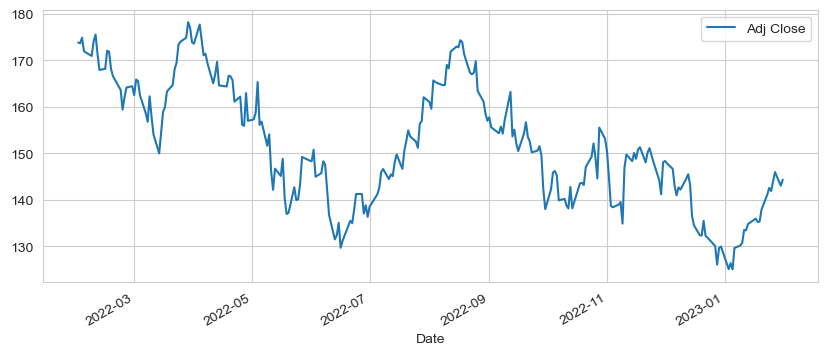

In [10]:
#Mapped out a years worth of adj closing prices 
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

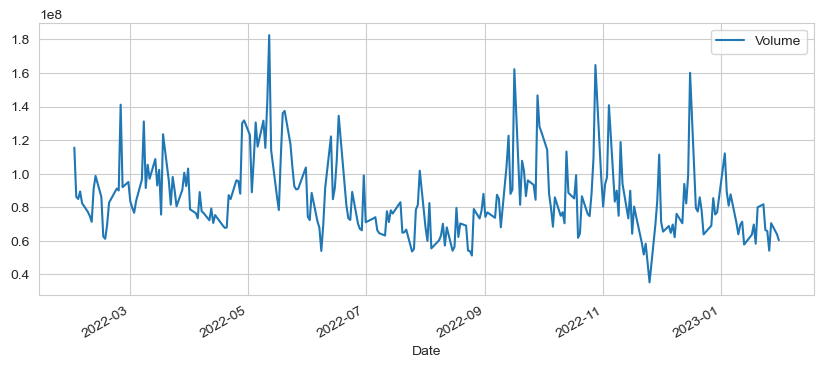

In [11]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.
<br>
For more info on the moving average check out the following links:
<br>
1.) http://www.investopedia.com/terms/m/movingaverage.asp
<br>
2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [12]:
#Calculate the moving averages for AAPL stock
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [13]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-01-31 00:00:00-05:00,170.160004,175.000000,169.509995,174.779999,173.771454,115541600,NaN,NaN,NaN
2022-02-01 00:00:00-05:00,174.009995,174.839996,172.309998,174.610001,173.602463,86213900,NaN,NaN,NaN
2022-02-02 00:00:00-05:00,174.750000,175.880005,173.330002,175.839996,174.825348,84914300,NaN,NaN,NaN
2022-02-03 00:00:00-05:00,174.479996,176.240005,172.119995,172.899994,171.902313,89418100,NaN,NaN,NaN
2022-02-04 00:00:00-05:00,171.679993,174.100006,170.679993,172.389999,171.613632,82465400,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

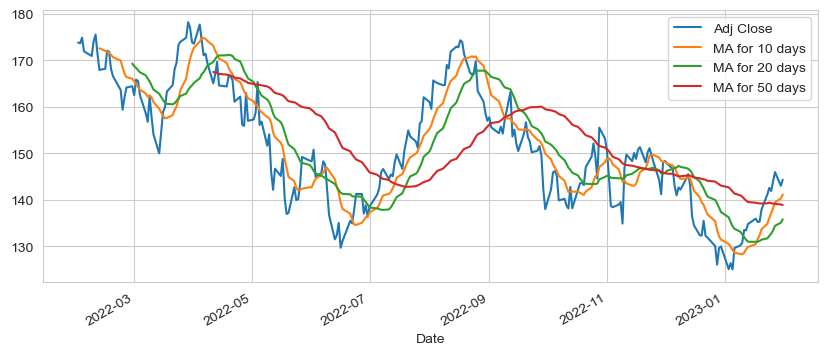

In [14]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

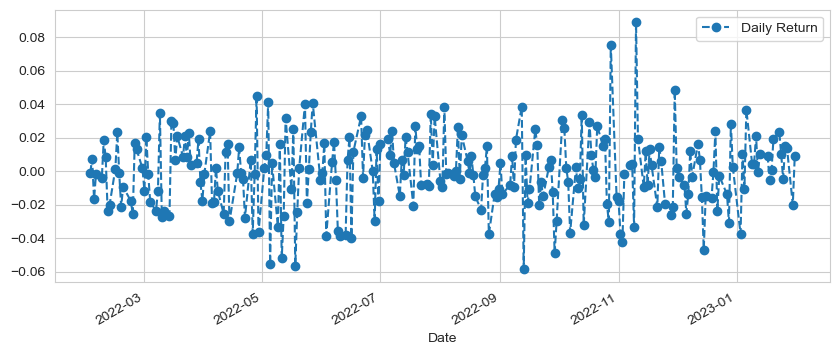

In [15]:
# Baseline analysis, now analyze daily returns and risk of a stock
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True, figsize=(10,4), linestyle='--', marker='o')
#In anyg

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

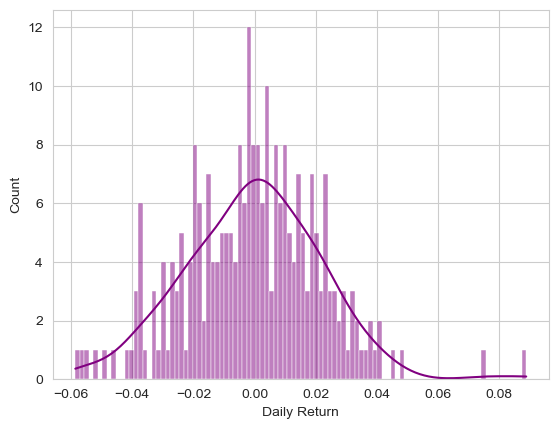

In [16]:
 sns.histplot(AAPL['Daily Return'].dropna(), bins=100, color='purple', kde=True)

<AxesSubplot:>

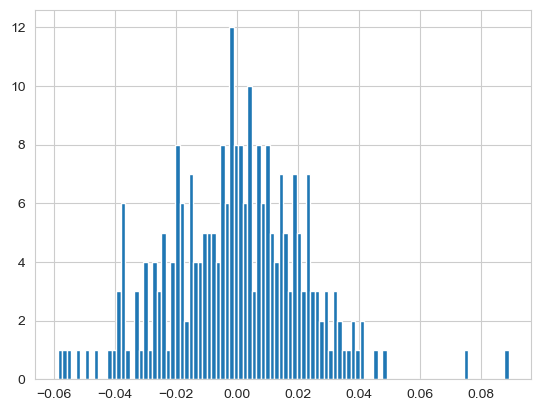

In [17]:
AAPL['Daily Return'].hist(bins=100)

In [18]:
# Create a dataframe of only the adj closing prices
closing_df = yf.download(tech_list, start, end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [19]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-01-31 00:00:00-05:00,173.771469,149.573502,135.698502,308.093140
2022-02-01 00:00:00-05:00,173.602463,151.193497,137.878494,305.893738
2022-02-02 00:00:00-05:00,174.825348,150.612503,148.036499,310.550079
2022-02-03 00:00:00-05:00,171.902313,138.845505,142.650497,298.453430
2022-02-04 00:00:00-05:00,171.613632,157.639496,143.016006,303.099915


In [20]:
# Daily Percentage Returns for each of the companies
tech_rets = closing_df.pct_change()

In [21]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-01-31 00:00:00-05:00,NaN,NaN,NaN,NaN
2022-02-01 00:00:00-05:00,-0.000973,0.010831,0.016065,-0.007139
2022-02-02 00:00:00-05:00,0.007044,-0.003843,0.073674,0.015222
2022-02-03 00:00:00-05:00,-0.016720,-0.078128,-0.036383,-0.038952
2022-02-04 00:00:00-05:00,-0.001679,0.135359,0.002562,0.015569


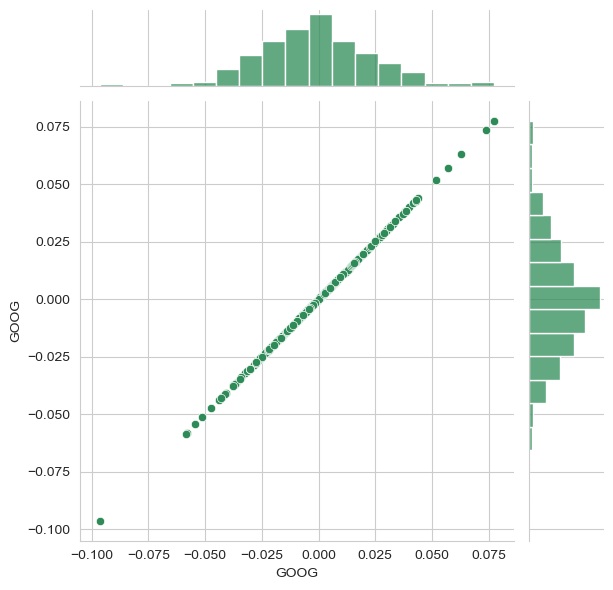

In [22]:
# Perfect when comparing the same
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

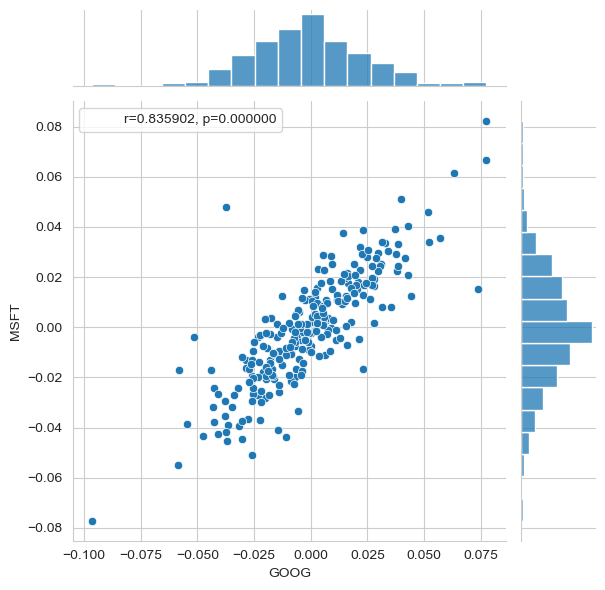

In [23]:
# Compare other companies to each other
graph = sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

# Since annotate is deprecated, create a legend for the pearson coefficient
r, p = stats.pearsonr(x=tech_rets['GOOG'].dropna(),y=tech_rets['MSFT'].dropna())
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

Pearson coefficient can show how correlated the daily percentage returns are from the two tech stocks

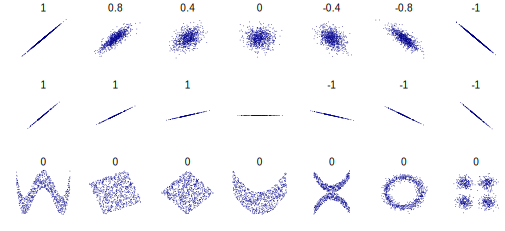

In [24]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot



In [25]:
# Can use sns.pairplot to automatically create the plots between each of the combinations 
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-01-31 00:00:00-05:00,NaN,NaN,NaN,NaN
2022-02-01 00:00:00-05:00,-0.000973,0.010831,0.016065,-0.007139
2022-02-02 00:00:00-05:00,0.007044,-0.003843,0.073674,0.015222
2022-02-03 00:00:00-05:00,-0.016720,-0.078128,-0.036383,-0.038952
2022-02-04 00:00:00-05:00,-0.001679,0.135359,0.002562,0.015569


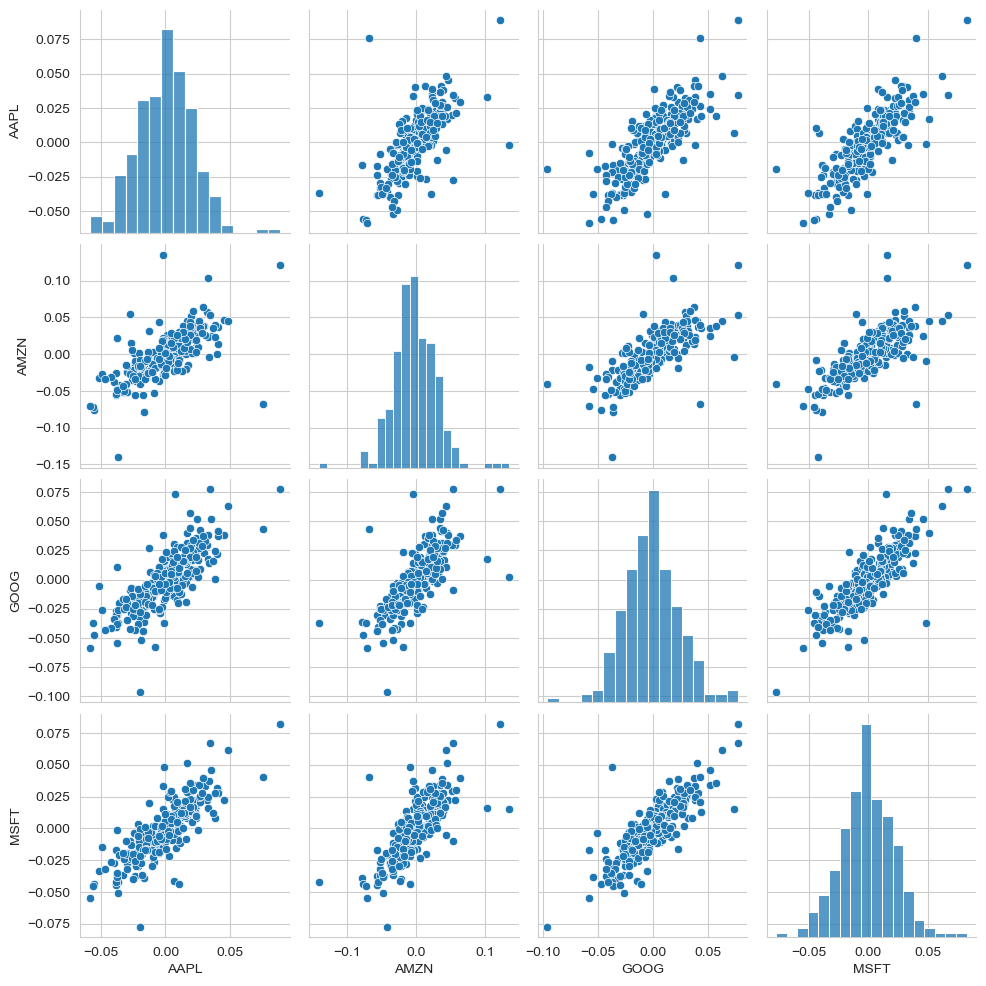

In [26]:
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows correlations on each of the tech giants' daily returns. It might be interesting to investigate individual comaprisons. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

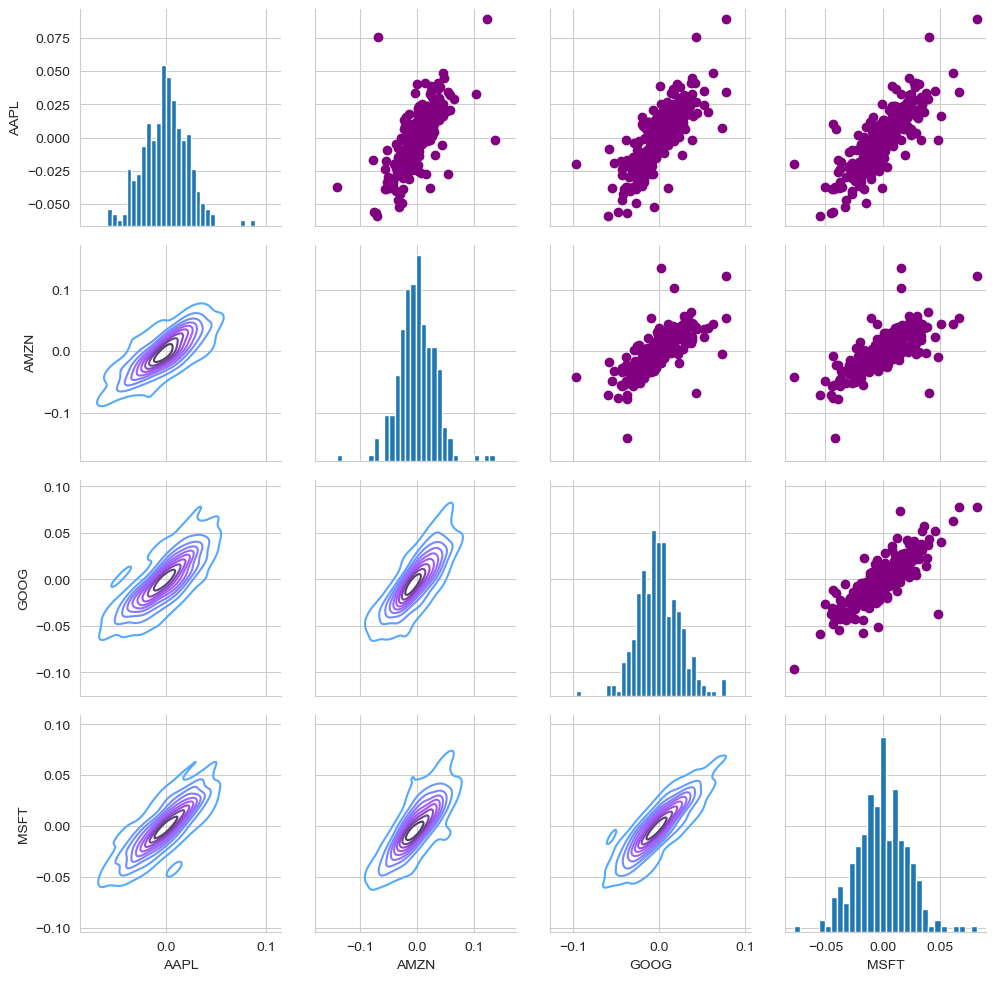

In [27]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)
# Now shows kde plot on lower triangle and purple scatter plot on upper triangle

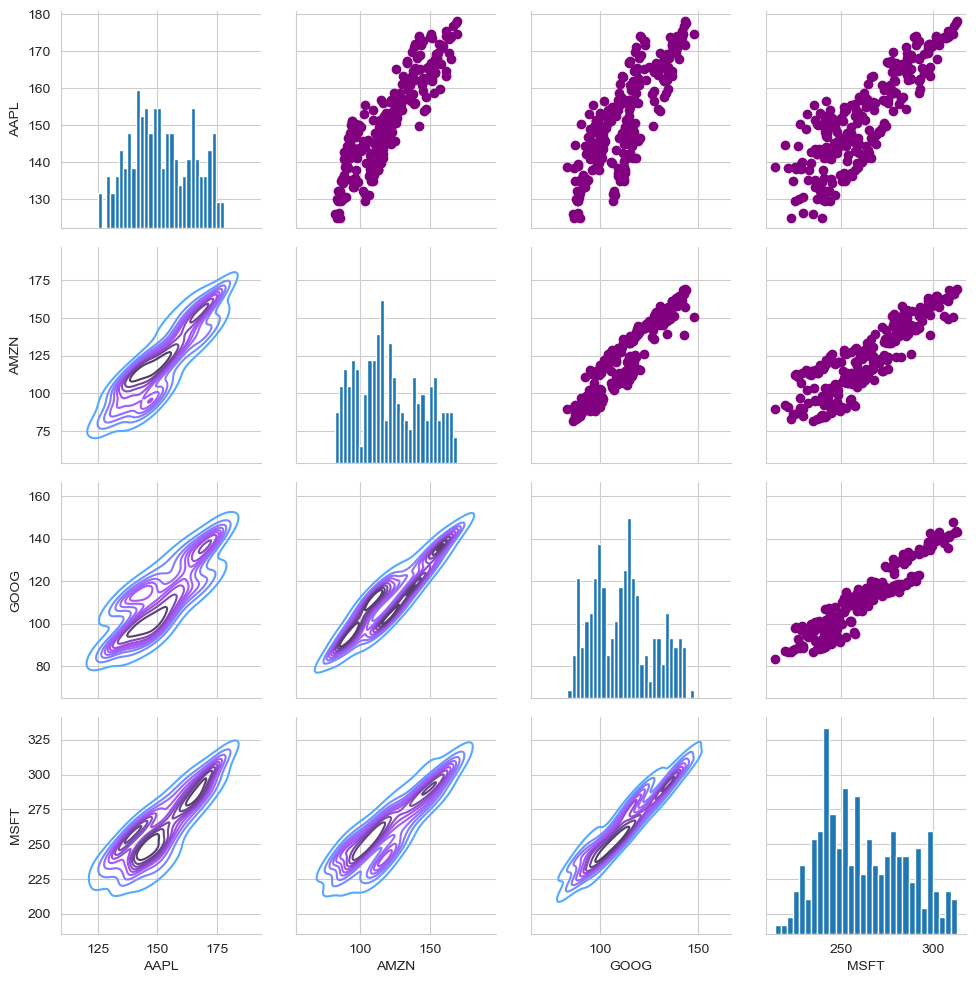

In [28]:
# Analysis of the correlation of the closing prices using this exact same technique.
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:>

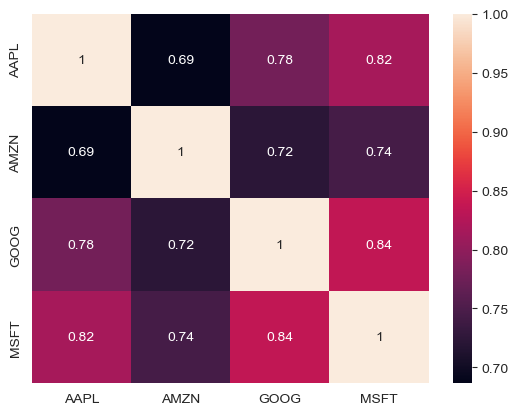

In [29]:
# Correlation plot
corr= tech_rets.corr()
sns.heatmap(corr, annot=True)
# actual numerical values for the correlation between the stocks' daily return values

<AxesSubplot:>

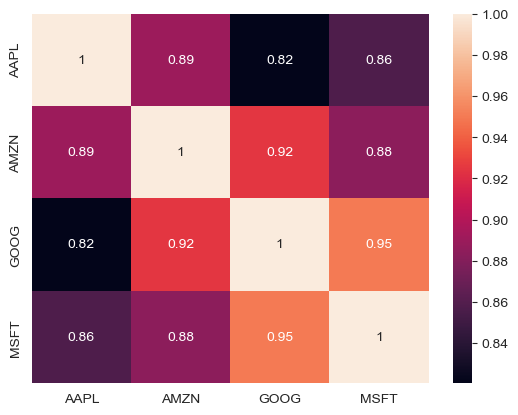

In [30]:
closingCorr = closing_df.corr()
sns.heatmap(closingCorr, annot=True)

We can see from the daily return analysis that google and microsoft have the highest correlation for daily stock return. 
<br>
Similarly in the stock's closing prices.
<br>
It's also interesting to see that all the technology companies are positively correlated.

Risk analysis: There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.


In [31]:
# Define new df of cleaned tech_rets
rets = tech_rets.dropna()

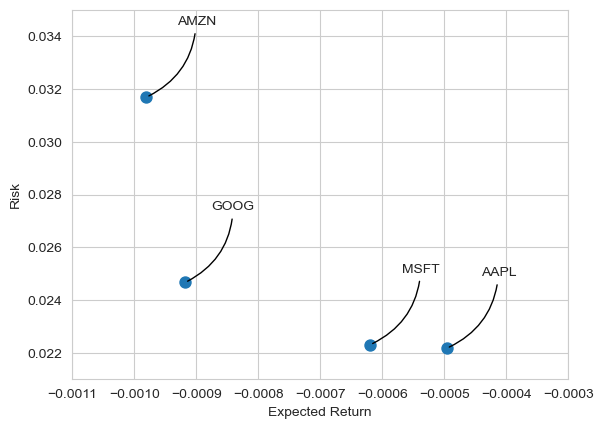

In [37]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.axis(ymin=0.021, ymax=0.035, xmin=-0.0011, xmax=-0.0003)

# Label scatter plots
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(\
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color = 'black'))
    
# We can see that currently all stocks currently have a negative expected return :(

## Value at Risk
<br>
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

## Value at Risk using the 'Bootstrap' Method
<br>
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile
<br>


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

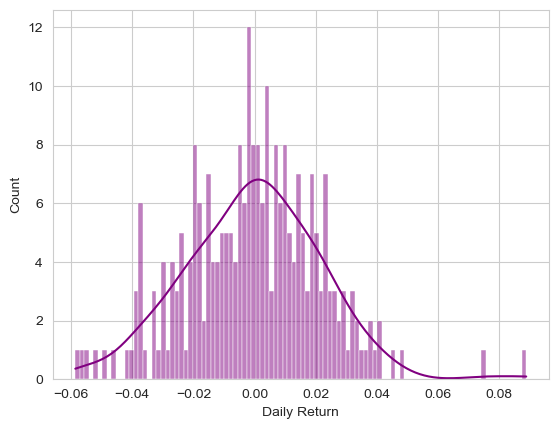

In [38]:
 sns.histplot(AAPL['Daily Return'].dropna(), bins=100, color='purple', kde=True)

In [39]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-02-01 00:00:00-05:00,-0.000973,0.010831,0.016065,-0.007139
2022-02-02 00:00:00-05:00,0.007044,-0.003843,0.073674,0.015222
2022-02-03 00:00:00-05:00,-0.016720,-0.078128,-0.036383,-0.038952
2022-02-04 00:00:00-05:00,-0.001679,0.135359,0.002562,0.015569
2022-02-07 00:00:00-05:00,-0.004235,0.001878,-0.028514,-0.016310


In [40]:
# Produces the empirical quantile at 0.05
rets['AAPL'].quantile(0.05)
# with 95% confidence our worst daily loss won't exceed this percent

-0.03736638146476029

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 3.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.037 * 1,000,000 = $37,000.
<br>
Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.
<br>
## Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:
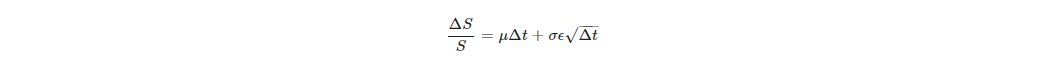
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

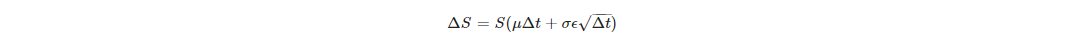
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp
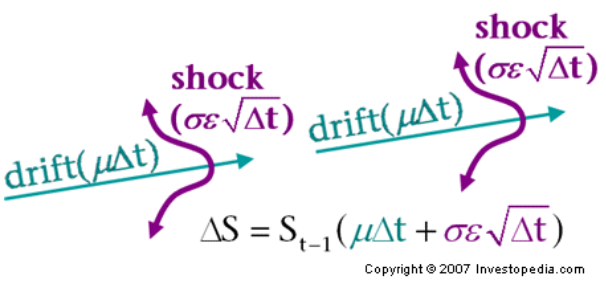
To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [41]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Grab mu (drift) from the expected return data from GOOGL (average)
mu = rets.mean()['GOOG']

# Grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [42]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc= mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (shock[x] + drift[x]))
        
    return price

In [43]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31 00:00:00-05:00,134.197998,135.843506,132.274002,135.698502,135.698502,34056000
2022-02-01 00:00:00-05:00,137.835007,138.199997,134.568253,137.878494,137.878494,51204000
2022-02-02 00:00:00-05:00,151.863495,152.100006,145.557495,148.036499,148.036499,89750000
2022-02-03 00:00:00-05:00,145.294998,149.117706,142.205002,142.650497,142.650497,56930000
2022-02-04 00:00:00-05:00,143.016998,144.535248,139.817505,143.016006,143.016006,49224000


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

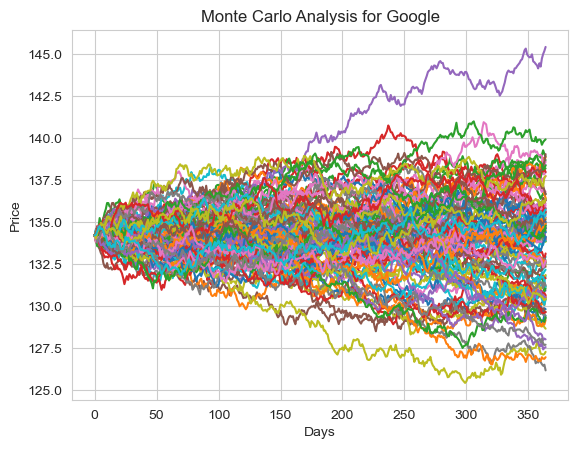

In [45]:
# Get the first opening price of Google stock
start_price = GOOG['Open'].iloc[0]

# Runs simulation 100 times to valuate risk of the stock
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [46]:
# Create a histogram of these end results
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

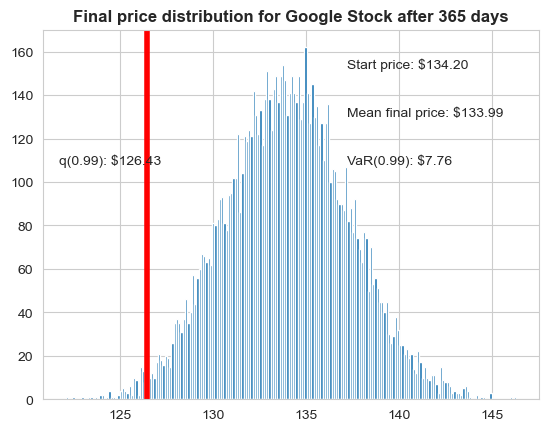

In [48]:
# Defines q as the 1 percent empirical quantile (99 percent of our values should fit within our output)
q = np.percentile(simulations, 1)
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $7.76 for every investment of 134.20 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $7.76 at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.

In [61]:
# 1) Estimating the values at risk for Gamestop
GME = yf.download("GME", start, end)

[*********************100%***********************]  1 of 1 completed


In [62]:
GME.describe()
GME.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-01-31 00:00:00-05:00 to 2023-01-31 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [63]:
GME_rets = GME['Adj Close'].pct_change()

In [64]:
GME_rets = GME_rets.dropna()

In [65]:
# Bootstrap method
GME_rets.quantile(0.05)
# Using the bootstrap method we can say with 95% confidence that our worst daily loss won't exceed this percent (~8.4%)

-0.08407373841140364

In [66]:
# Monte Carlo Method
GMEstart_price =  GME['Open'].iloc[0]
# Grab mu (drift) from the expected return data from GOOGL (average)
GMEmu = GME_rets.mean()

# Grab the volatility of the stock from the std() of the average return
GMEsigma = GME_rets.std()

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(GMEstart_price,days,GMEmu,GMEsigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for GME Stock after 365 days')

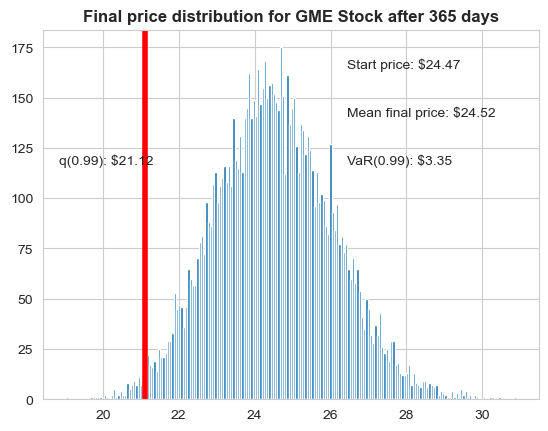

In [68]:
q = np.percentile(simulations, 1)
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %GMEstart_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (GMEstart_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for GME Stock after %s days" % days, weight='bold')

For Gamestop at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the GME stock, which looks to be $3.35 for every investment of 24.47 (the price of one inital GME stock).

This basically means for every initial stock you purchase your putting about $3.35 at risk 99% of the time from our Monte Carlo Simulation.

In [72]:
# 3 See the correlations between two stocks, in this case I'll compare GME and Nintendo 
NTDOY = yf.download("NTDOY", start, end)
# Create a df containing both NTDOY and GME's adj close price
GMENTD = {'NTDOY':NTDOY['Adj Close'], 'GME':GME['Adj Close']}

[*********************100%***********************]  1 of 1 completed


In [74]:
GMENTDcorr = pd.DataFrame(GMENTD)
GMENTDcorr.head()

,NTDOY,GME
Date,,
2022-01-31 00:00:00-05:00,12.220,27.232500
2022-02-01 00:00:00-05:00,12.390,28.150000
2022-02-02 00:00:00-05:00,12.532,25.010000
2022-02-03 00:00:00-05:00,12.320,24.807501
2022-02-04 00:00:00-05:00,12.604,25.584999


In [75]:
GMENTDcorr = GMENTDcorr.pct_change()

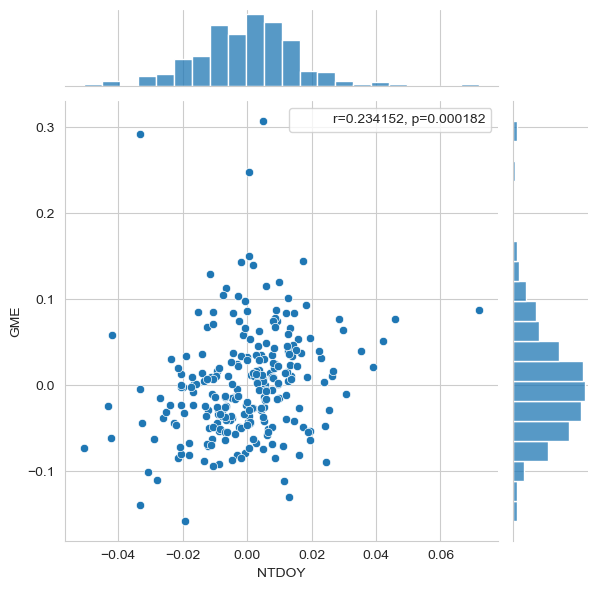

In [76]:
# Merge Nintendo and Gamestop 
# Compare other companies to each other
graph = sns.jointplot(x='NTDOY', y='GME', data=GMENTDcorr, kind='scatter')

# Since annotate is deprecated, create a legend for the pearson coefficient
r, p = stats.pearsonr(x=GMENTDcorr['NTDOY'].dropna(),y=GMENTDcorr['GME'].dropna())
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])